# Perceptron
Notice `Linear` that happened to show in task

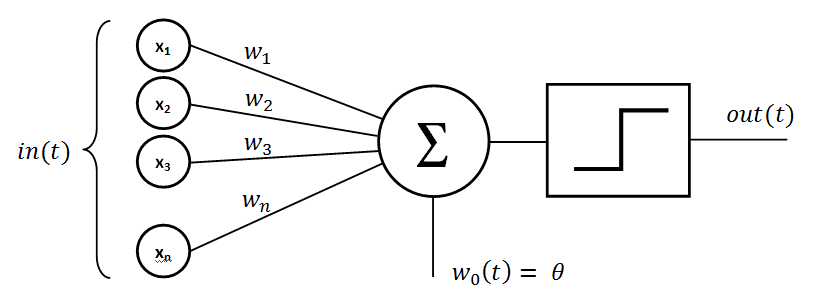

### Create a Perceptron (See task answer)

# Cicles Classification Problem

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

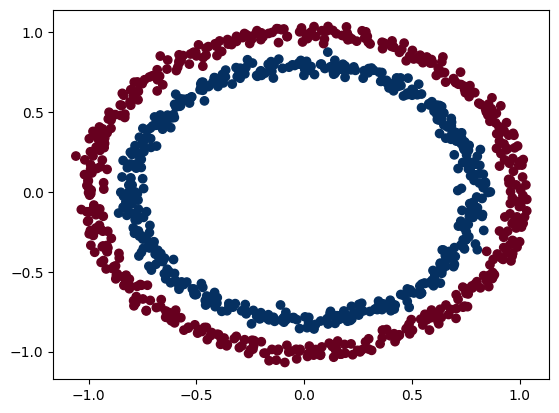

In [2]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [3]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train Shape: {X_train.shape} | Test Shape: {X_test.shape}")


Train Shape: torch.Size([800, 2]) | Test Shape: torch.Size([200, 2])


In [4]:
print(f"Data Point: {X_train[0]}")

Data Point: tensor([ 0.1878, -0.9547])


# Activation Function

### Go [Here](https://playground.tensorflow.org/)

In [5]:
import torch.nn as nn
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        return torch.squeeze(self.fc3(self.relu(self.fc2(self.relu(self.fc1(x))))))

In [6]:
model: nn.Module = CircleModel()
print(model)

CircleModel(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [7]:
import torch.optim as optim
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
print(f"Model: {model.state_dict()}")

Model: OrderedDict([('fc1.weight', tensor([[ 0.6083,  0.1435],
        [-0.3105, -0.0875],
        [-0.0170, -0.4875],
        [ 0.2660,  0.3625],
        [ 0.5946, -0.4675],
        [-0.0370,  0.2359],
        [-0.7020, -0.3210],
        [-0.0527, -0.0805],
        [-0.6141,  0.1377],
        [-0.3149,  0.4720]])), ('fc1.bias', tensor([-0.1952,  0.4777, -0.4620, -0.1119,  0.3913, -0.6702, -0.4255,  0.3739,
         0.1124,  0.2226])), ('fc2.weight', tensor([[ 0.2727, -0.2959, -0.0482,  0.0407, -0.0511, -0.0771,  0.2528,  0.1086,
          0.2731, -0.2768],
        [ 0.3089, -0.0875, -0.2513,  0.1702, -0.1132, -0.1676, -0.2881,  0.1620,
          0.1033, -0.2716],
        [ 0.3076,  0.2965,  0.0460,  0.1881,  0.0492,  0.0925, -0.0041,  0.2980,
          0.1524,  0.1752],
        [ 0.0958,  0.2438, -0.0985,  0.2581, -0.1574,  0.3051,  0.0029,  0.1054,
         -0.0377,  0.2885],
        [ 0.0569, -0.1998, -0.2835, -0.2058, -0.2320,  0.1237,  0.1265,  0.1727,
          0.1366, -0.0997],


In [9]:
from helper_functions import plot_decision_boundary

def plot_boundaries(
    model: nn.Module,
    train_data: torch.Tensor = X_train,
    train_labels: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_labels: torch.Tensor = y_test,
    ):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, train_data, train_labels)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, test_data, test_labels)

def train(
        model: nn.Module,
        loss_function: nn.Module = loss_function,
        optimizer: optim.Optimizer = optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(num_epochs):
        model.train()

        y_preds = model(train_data)

        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

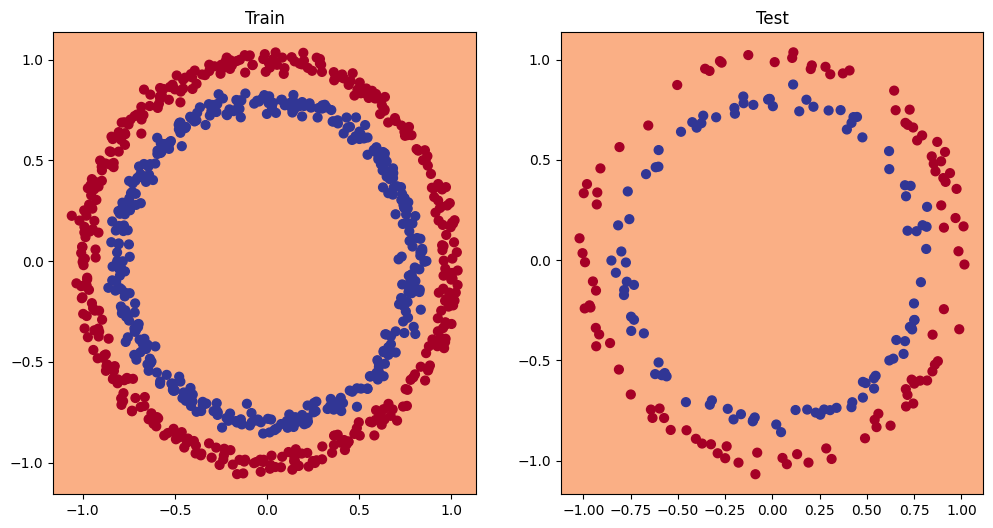

In [10]:
plot_boundaries(model)

In [11]:
epochs_count, train_loss, test_loss = train(model, num_epochs=1000)

Epoch 0: train loss 0.6986968517303467, test loss 0.6991550326347351
Epoch 10: train loss 0.6957421898841858, test loss 0.6961840987205505
Epoch 20: train loss 0.6933324337005615, test loss 0.693772554397583
Epoch 30: train loss 0.6915397644042969, test loss 0.6918877959251404
Epoch 40: train loss 0.6902103424072266, test loss 0.6905267238616943
Epoch 50: train loss 0.689175009727478, test loss 0.6894438862800598
Epoch 60: train loss 0.6883071064949036, test loss 0.688508927822113
Epoch 70: train loss 0.6874568462371826, test loss 0.6875889301300049
Epoch 80: train loss 0.6865299940109253, test loss 0.6866328716278076
Epoch 90: train loss 0.6854901313781738, test loss 0.6856058239936829
Epoch 100: train loss 0.6843277215957642, test loss 0.6844449639320374
Epoch 110: train loss 0.6830034852027893, test loss 0.6831163763999939
Epoch 120: train loss 0.6814757585525513, test loss 0.681553065776825
Epoch 130: train loss 0.6797212362289429, test loss 0.6797371506690979
Epoch 140: train loss

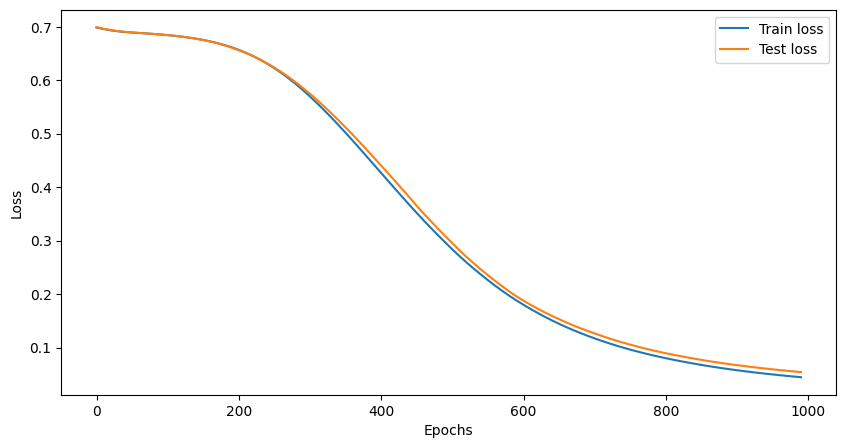

In [12]:
plot_stats(epochs=epochs_count, train_loss=train_loss, test_loss=test_loss)


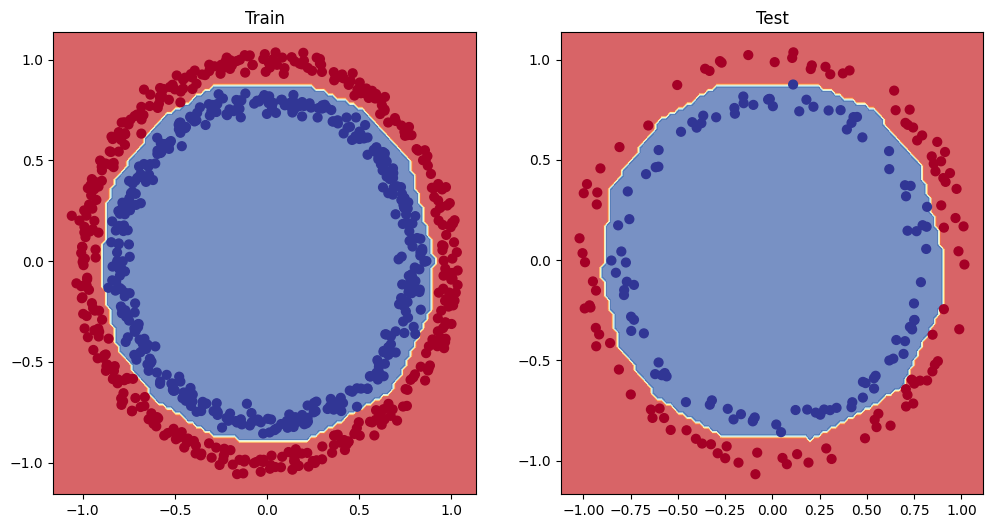

In [13]:
plot_boundaries(model)

In [14]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="binary")

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

accuracy(y_preds, y_test)

tensor(0.9950)

In [15]:
sample = torch.tensor([[-0.8, -0.5]]) # put any sample. Note size of sample (number, 2)
with torch.inference_mode():
    y_pred = model(sample)
    y_pred = torch.sigmoid(y_pred)
    y_pred = torch.round(y_pred)
    


y_pred

tensor(0.)

# <font color="green">Blob Solver Exercise</font>

# <font color="green">MNist Solver Exercise</font>

# Terminologies & Recap
1. **Activation Function**: A function that decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.


2. **Overfitting**: Overfitting occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
3. **Underfitting**: Underfitting occurs when a model is too simple to learn the underlying structure of the data.